In [1]:
%run base.ipynb
%matplotlib inline

import adabound
import functools as ft
import matplotlib.pyplot as plt
import numpy as np
import siglayer.examples as examples
import torch.nn.functional as F
import torch.utils.data as torchdata
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import utils

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Hyperparameters

In [2]:
train_batch_size = 128
val_batch_size = 128
max_epochs = 5

optimizer_fn = adabound.AdaBound
loss_fn = F.nll_loss

sig_depth = 2

output_shape = (10,)

## Data

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST('../datasets', train=True, transform=transform)
eval_dataset = datasets.MNIST('../datasets', train=False, transform=transform)
    
train_dataloader = torchdata.DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True, num_workers=8)
eval_dataloader = torchdata.DataLoader(eval_dataset, batch_size=val_batch_size, shuffle=False, num_workers=8)

Feature shape: (1, 28, 28)
Label shape: ()
Example element:


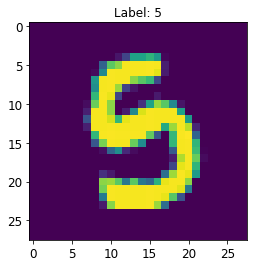

In [4]:
example_batch_x, example_batch_y = next(iter(train_dataloader))
example_x, example_y = example_batch_x[0], example_batch_y[0]

print(f'Feature shape: {tuple(example_x.shape)}')
print(f'Label shape: {tuple(example_y.shape)}')
print('Example element:')
plt.imshow(example_x.squeeze())
plt.title(f'Label: {example_y.item()}')
plt.show()

## Networks: SigNet and ReluNet

In [5]:
final_nonlinearity = ft.partial(F.log_softmax, dim=-1)
signet = examples.create_feedforward(output_shape, sig=True, sig_depth=sig_depth, 
                                     final_nonlinearity=final_nonlinearity)
relunet = examples.create_feedforward(output_shape, sig=False, 
                                      final_nonlinearity=final_nonlinearity)

## Train Model

In [6]:
history = {}
train_model = utils.create_train_model_fn(max_epochs, optimizer_fn, loss_fn, train_dataloader, eval_dataloader, 
                                          example_batch_x)

In [7]:
train_model(relunet, 'ReluNet', history)

TrainAcc: 0.10 TrainLoss: 2.31 ValAcc: 0.10 ValLoss: 2.31
Epoch:    1 Loss: 0.204: 100%|██████████| 469/469 [00:04<00:00, 123.48it/s]
TrainAcc: 0.92 TrainLoss: 0.26 ValAcc: 0.93 ValLoss: 0.25
Epoch:    2 Loss: 0.245: 100%|██████████| 469/469 [00:06<00:00, 73.80it/s]
TrainAcc: 0.95 TrainLoss: 0.18 ValAcc: 0.94 ValLoss: 0.19
Epoch:    3 Loss: 0.154: 100%|██████████| 469/469 [00:04<00:00, 113.06it/s]
TrainAcc: 0.95 TrainLoss: 0.15 ValAcc: 0.95 ValLoss: 0.16
Epoch:    4 Loss: 0.165: 100%|██████████| 469/469 [00:04<00:00, 103.87it/s]
TrainAcc: 0.96 TrainLoss: 0.13 ValAcc: 0.95 ValLoss: 0.14
Epoch:    5 Loss: 0.070: 100%|██████████| 469/469 [00:05<00:00, 133.10it/s]
TrainAcc: 0.97 TrainLoss: 0.11 ValAcc: 0.96 ValLoss: 0.13
Training took 53.65 seconds.


In [8]:
train_model(signet, 'SigNet', history)

TrainAcc: 0.10 TrainLoss: 2.48 ValAcc: 0.10 ValLoss: 2.50
Epoch:    1 Loss: 0.759: 100%|██████████| 469/469 [01:01<00:00,  7.80it/s]
TrainAcc: 0.70 TrainLoss: 0.93 ValAcc: 0.70 ValLoss: 0.95
Epoch:    2 Loss: 1.852: 100%|██████████| 469/469 [00:59<00:00,  7.91it/s]
TrainAcc: 0.78 TrainLoss: 0.76 ValAcc: 0.77 ValLoss: 0.81
Epoch:    3 Loss: 0.755: 100%|██████████| 469/469 [01:00<00:00,  7.74it/s]
TrainAcc: 0.77 TrainLoss: 0.73 ValAcc: 0.76 ValLoss: 0.75
Epoch:    4 Loss: 0.535: 100%|██████████| 469/469 [01:00<00:00,  7.66it/s]
TrainAcc: 0.80 TrainLoss: 0.66 ValAcc: 0.79 ValLoss: 0.69
Epoch:    5 Loss: 0.603: 100%|██████████| 469/469 [01:01<00:00,  7.78it/s]
TrainAcc: 0.76 TrainLoss: 0.73 ValAcc: 0.75 ValLoss: 0.78
Training took 462.27 seconds.


## Results

In [10]:
signet

AttributeError: 'functools.partial' object has no attribute '__qualname__'

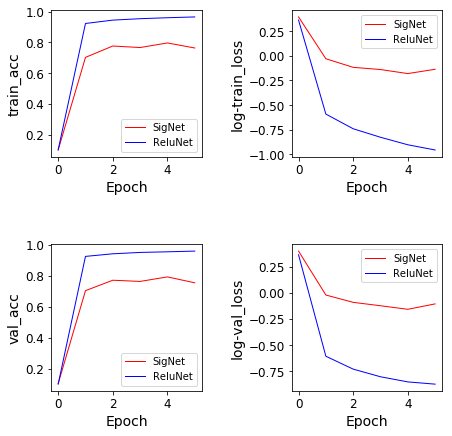

SigNet parameter count: 25638
ReluNet parameter count: 27562


In [9]:
utils.print_results(signet, relunet, history)